In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [5]:
df=pd.read_csv('cleaned_data.csv')

In [6]:
df.head(1)

,TransactionID,CustomerID,ProductID,Quantity,TotalValue,Price_x,ProductName,Category,CustomerName,Region,Date,Month,Year
0,T00001,C0199,P067,1.0,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Andrea Jenkins,Europe,25,8,2024


In [7]:
df.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'Quantity', 'TotalValue',
       'Price_x', 'ProductName', 'Category', 'CustomerName', 'Region', 'Date',
       'Month', 'Year'],
      dtype='object')

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

TransactionID    0
CustomerID       0
ProductID        0
Quantity         0
TotalValue       0
Price_x          0
ProductName      0
Category         0
CustomerName     0
Region           0
Date             0
Month            0
Year             0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TransactionID  1000 non-null   object 
 1   CustomerID     1000 non-null   object 
 2   ProductID      1000 non-null   object 
 3   Quantity       1000 non-null   float64
 4   TotalValue     1000 non-null   float64
 5   Price_x        1000 non-null   float64
 6   ProductName    1000 non-null   object 
 7   Category       1000 non-null   object 
 8   CustomerName   1000 non-null   object 
 9   Region         1000 non-null   object 
 10  Date           1000 non-null   int64  
 11  Month          1000 non-null   int64  
 12  Year           1000 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 101.7+ KB


In [25]:
df.head(2)

,TransactionID,CustomerID,ProductID,Quantity,TotalValue,Price_x,ProductName,Category,CustomerName,Region,Date,Month,Year
0,T00001,C0199,P067,1.0,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Andrea Jenkins,Europe,25,8,2024
1,T00761,C0199,P022,4.0,550.16,137.54,HomeSense Wall Art,Home Decor,Andrea Jenkins,Europe,1,10,2024


In [28]:
df.drop('TransactionID',inplace=True,axis=1)
df.drop('CustomerID',inplace=True,axis=1)
df.drop('ProductID',inplace=True,axis=1)
df.drop('ProductName',inplace=True,axis=1)
df.drop('CustomerName',inplace=True,axis=1)
df.drop('Date',inplace=True,axis=1)
df.drop('Month',inplace=True,axis=1)
df.drop('Year',inplace=True,axis=1)

In [29]:
df.head(2)

,Quantity,TotalValue,Price_x,Category,Region
0,1.0,300.68,300.68,Electronics,Europe
1,4.0,550.16,137.54,Home Decor,Europe


In [30]:
df['Category'].unique()

array(['Electronics', 'Home Decor', 'Books', 'Clothing'], dtype=object)

In [32]:
category_map={'Clothing': 3, 'Electronics': 2, 'Home Decor': 4,'Books':1}

In [31]:
df['Region'].unique()

array(['Europe', 'Asia', 'South America', 'North America'], dtype=object)

In [33]:
region_map={'Europe':4,'South America':1,'North America':2,'Asia':3}

In [34]:
df['category']=df['Category'].map(category_map)
df['region']=df['Region'].map(region_map)

In [35]:
df.head(2)

,Quantity,TotalValue,Price_x,Category,Region,category,region
0,1.0,300.68,300.68,Electronics,Europe,2,4
1,4.0,550.16,137.54,Home Decor,Europe,4,4


In [36]:
df.drop('Category',inplace=True,axis=1)
df.drop('Region',inplace=True,axis=1)

In [37]:
df.head(2)

,Quantity,TotalValue,Price_x,category,region
0,1.0,300.68,300.68,2,4
1,4.0,550.16,137.54,4,4


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Quantity    1000 non-null   float64
 1   TotalValue  1000 non-null   float64
 2   Price_x     1000 non-null   float64
 3   category    1000 non-null   int64  
 4   region      1000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 39.2 KB


In [45]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [46]:
X_scaled=scaler.fit_transform(df)

In [47]:
X_scaled

array([[-1.37548802, -0.7898504 ,  0.19994831, -0.40067566,  1.41253436],
       [ 1.30926413, -0.2837009 , -0.95982019,  1.36441535,  1.41253436],
       [-0.48057063,  0.29366012,  1.02950198,  1.36441535,  1.41253436],
       ...,
       [ 1.30926413, -0.94550132, -1.53956225,  1.36441535, -1.20650339],
       [-0.48057063,  0.61985347,  1.60099757, -1.28322116,  0.53952178],
       [ 1.30926413,  0.51192036, -0.26285008,  1.36441535,  0.53952178]])

In [56]:
X_scaled.shape

(1000, 5)

In [67]:
df=pd.DataFrame(X_scaled,columns=df.columns)

In [68]:
df

,Quantity,TotalValue,Price_x,category,region
0,-1.375488,-0.789850,0.199948,-0.400676,1.412534
1,1.309264,-0.283701,-0.959820,1.364415,1.412534
2,-0.480571,0.293660,1.029502,1.364415,1.412534
3,-0.480571,-0.804012,-0.893635,-0.400676,1.412534
4,-1.375488,-0.789850,0.199948,-0.400676,0.539522
...,...,...,...,...,...
995,-0.480571,-1.334629,-1.823284,-0.400676,-1.206503
996,0.414347,1.140428,1.029502,1.364415,-1.206503
997,1.309264,-0.945501,-1.539562,1.364415,-1.206503
998,-0.480571,0.619853,1.600998,-1.283221,0.539522


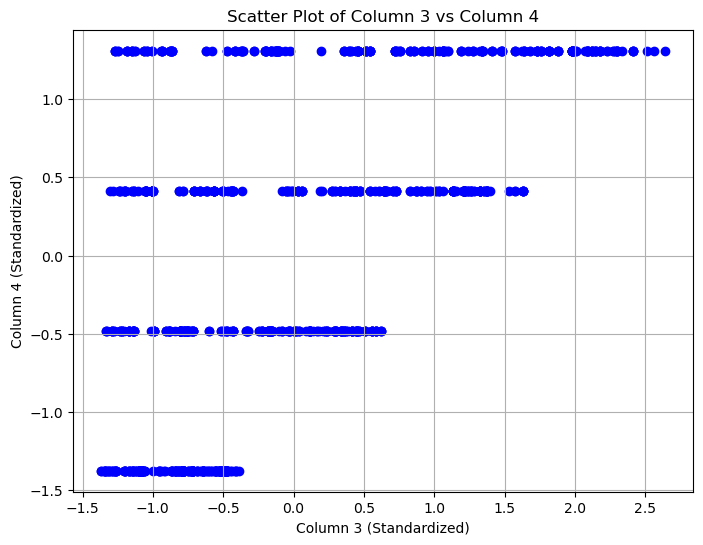